# Sea Turtle Nesting and Rising Ocean Temperatures 𓆉 

Exploring datasets on sea turtle nesting locations, sea surface temperature, and endangered sea turtle species. 

## About the project

During the winter break I went back to the Philippines and drove to a town called Bagac in the province of Bataan where volunteers of the Pag-asa Pawikan Protection and Conservation Center look after nests of hawksbill sea turtles and release baby sea turtles in the beach once they have hatched. Hawksbills are considered critically endangered species because their eggs have been vulnerable to poachers, predators, and climate change. I went to the center in time for hatching season November to February and released a baby sea turtles in the ocean which I named, "Malaya" (meaning Freedom).

This project is for Malaya. My goal is to create a map of the turtle nesting sites in the world with data showing the rising ocean temperatures in the different hemispheres. More research has been released showing the effects of warmer sand to the sea turtle eggs. Among the consequences of rising temperature is that it produces more female hatchlings. https://www.nationalgeographic.com/science/article/australia-green-sea-turtles-turning-female-climate-change-raine-island-sex-temperature 

Backup plan: Rising ocean temperatures are just among the external factors affecting sea turtle nesting and hatching and so if I am unable to produce a map with the datasets that I have, I can produce a graphic story of the other factors affecting turtle nesting and hatching using datawrapper.



## Datasets


* The State of the Worlds Sea Turtles - This is the main database on sea turtle nesting in which information about sea turtle nesting activities has been provided by more than 600 different contributors from 130 countries. Request for Nesting Site Locations in csv format and Shapefile have been made.

* Backup files! If the State of the Worlds Sea Turtles does not get back to me on my request, a csv of their data has been cited by a research on turtle fecundity and made public on Github Sea turtle reproductive energy https://github.com/nicholaswunz/turtle-fecundity || Filename: nesting-sites, turtle-species
  

* NASA Ocean Warming Annual Data (1957-2020) https://www.nasa.gov/stem-content/annual-ocean-warming-data-set/ || Filename: ocean-warming

* Ocean Data Viewer - Mean Annual Sea Surface Temperature (2009-2013)
https://data.unep-wcmc.org/datasets/36  / Github - Ocean Data Viewer https://github.com/unepwcmc/ocean-data-viewer || Folder: map-sea-temp 

## Data Exploration

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

### Ocean Warming

In [10]:
ocean = pd.read_csv('ocean-warming.csv')
ocean

,Source (1/24/2023): https://climate.nasa.gov/vital-signs/ocean-warming/,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,YEAR,WO,WOse,NH,NHse,SH,SHse
1,1957.5,-9.303,2.025,-3.149,0.925,-6.153,1.1
2,1958.5,-8.059,2.017,-2.321,0.851,-5.738,1.166
3,1959.5,-8.713,2.036,-2.505,0.824,-6.208,1.212
4,1960.5,-5.479,1.893,-1.587,0.746,-3.892,1.148
...,...,...,...,...,...,...,...
60,2016.5,21.879,0.184,9.654,0.079,12.225,0.104
61,2017.5,22.147,0.19,9.599,0.088,12.548,0.102
62,2018.5,23.294,0.211,10.883,0.085,12.411,0.125
63,2019.5,24.442,0.179,11.444,0.085,12.999,0.094


Notes for interpreting NASA data is on the ocean-warming-about.pdf

Column Name | Description
Col A: Year

Col B: WO
Change in World Ocean Heat Content in zettajoules (ZJ) relative to 1957. Each data point represents a five-year (pentadal) running average where the pentadal estimate is provided for the midpoint of the 5-year period. For example, the 1957 value includes OHC estimates from 1955-1959 and the 2020 estimate includes OHC values from 2018-2022.

Col C: WOse
Standard error (se) for the World Ocean data point in ZJ.
"±se" is the “uncertainty margin,” or the range from the average within which there is a high probability that the true number resides. For example, when we say the OHC for a particular year is 220 +/- 2 ZJ, the true value for that year has a high probability of being between 218 and 222 zettajoules. The uncertainty margin exists both because of:
• natural variability (some years, more heat goes into the ocean, other years, less so; some years, more energy goes increasingly deeper in the ocean, and other years, more of it stays closer to the surface)
• how accurately available instruments are able to measure ocean heat; this has substantially improved over time
The standard error decreases over time reflecting larger numbers of observation buoys.

Col D: NH
Annually averaged change in OHC for the Northern Hemisphere in ZJ relative to 1957. Each data point represents a 5-year (pentadal) running average.

Col E: NHse Standard error for the Northern Hemisphere OHC in ZJ.

Col G: SHse Standard error for the Southern Hemisphere OHC in ZJ.

### State of the World's Sea Turtles - Nesting Sites

In [11]:
site_locations = pd.read_csv('site_locations.csv')
site_locations

,code,country,siteid,site_name,compiler,species,common_name,years_monitored,monitoring_effort,latitude,longitude,nesting_status,mds,contact1,contact2,contact3,contact4,contact5
0,AU,Australia,AU84,80 Mile Beach - AP +100km,NaN,Natator depressus,Flatback sea turtle,2008,Unknown,-19.749474,120.678526,UNQUANTIFIED,Level 2,"Bob Prince, Department of Environment and Cons...",NaN,NaN,NaN,NaN
1,AU,Australia,AU85,80 Mile Beach - AP +105km,NaN,Natator depressus,Flatback sea turtle,2008,Unknown,-19.778027,120.603573,UNQUANTIFIED,Level 2,"Bob Prince, Department of Environment and Cons...",NaN,NaN,NaN,NaN
2,AU,Australia,AU86,80 Mile Beach - AP +110km,NaN,Natator depressus,Flatback sea turtle,2008,Unknown,-19.791114,120.555983,UNQUANTIFIED,Level 2,"Bob Prince, Department of Environment and Cons...",NaN,NaN,NaN,NaN
3,AU,Australia,AU87,80 Mile Beach - AP +115km,NaN,Natator depressus,Flatback sea turtle,2008,Unknown,-19.808689,120.514715,UNQUANTIFIED,Level 2,"Bob Prince, Department of Environment and Cons...",NaN,NaN,NaN,NaN
4,AU,Australia,AU88,80 Mile Beach - AP +120km,NaN,Natator depressus,Flatback sea turtle,2008,Unknown,-19.822966,120.469505,UNQUANTIFIED,Level 2,"Bob Prince, Department of Environment and Cons...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,PH,Philippines,PH06,"Languil Island, Basilian",NaN,Chelonia mydas,Green sea turtle,2000,Unknown,6.644114,122.138443,UNQUANTIFIED,Level 2,"SWOT Database Manager, The State of the World'...",NaN,NaN,NaN,NaN
495,PH,Philippines,PH05,"Panikian Island, Zamboanga del Sur",NaN,Chelonia mydas,Green sea turtle,2000,Unknown,7.395092,123.341557,UNQUANTIFIED,Level 2,"SWOT Database Manager, The State of the World'...",NaN,NaN,NaN,NaN
496,PH,Philippines,PH05,"Panikian Island, Zamboanga del Sur",NaN,Eretmochelys imbricata,Hawksbill sea turtle,2000,Unknown,7.395092,123.341557,QUANTIFIED,NaN,"Angie Viloria, Department of Environment and N...","Renato Cruz, Department of Environment and Nat...","Romeo Trono, Conservation International, romyt...",NaN,NaN
497,PH,Philippines,PH07,San Miguel Islands,NaN,Chelonia mydas,Green sea turtle,2000,Unknown,7.844337,118.442409,UNQUANTIFIED,Level 2,"SWOT Database Manager, The State of the World'...",NaN,NaN,NaN,NaN


## Building A Map of Turtle Nesting Site Locations

The State of the World's Sea Turtles data provides a list of the location of each nesting site in the Asia and Pacific region. Each row is a sea turtle nesting site and each column is a variable that describes the species, site name, year monitored, and nest coordinates among others. In order to tell how ocean warming is affecting sea turtle nesting sites, I first wanted to show where they are located. I customized a map using https://www.mapbox.com/ and used the coordinates in obis_seamap_swot_65b5cb597f9f8_20240129_143257_site_locations_csv to locate the nests.




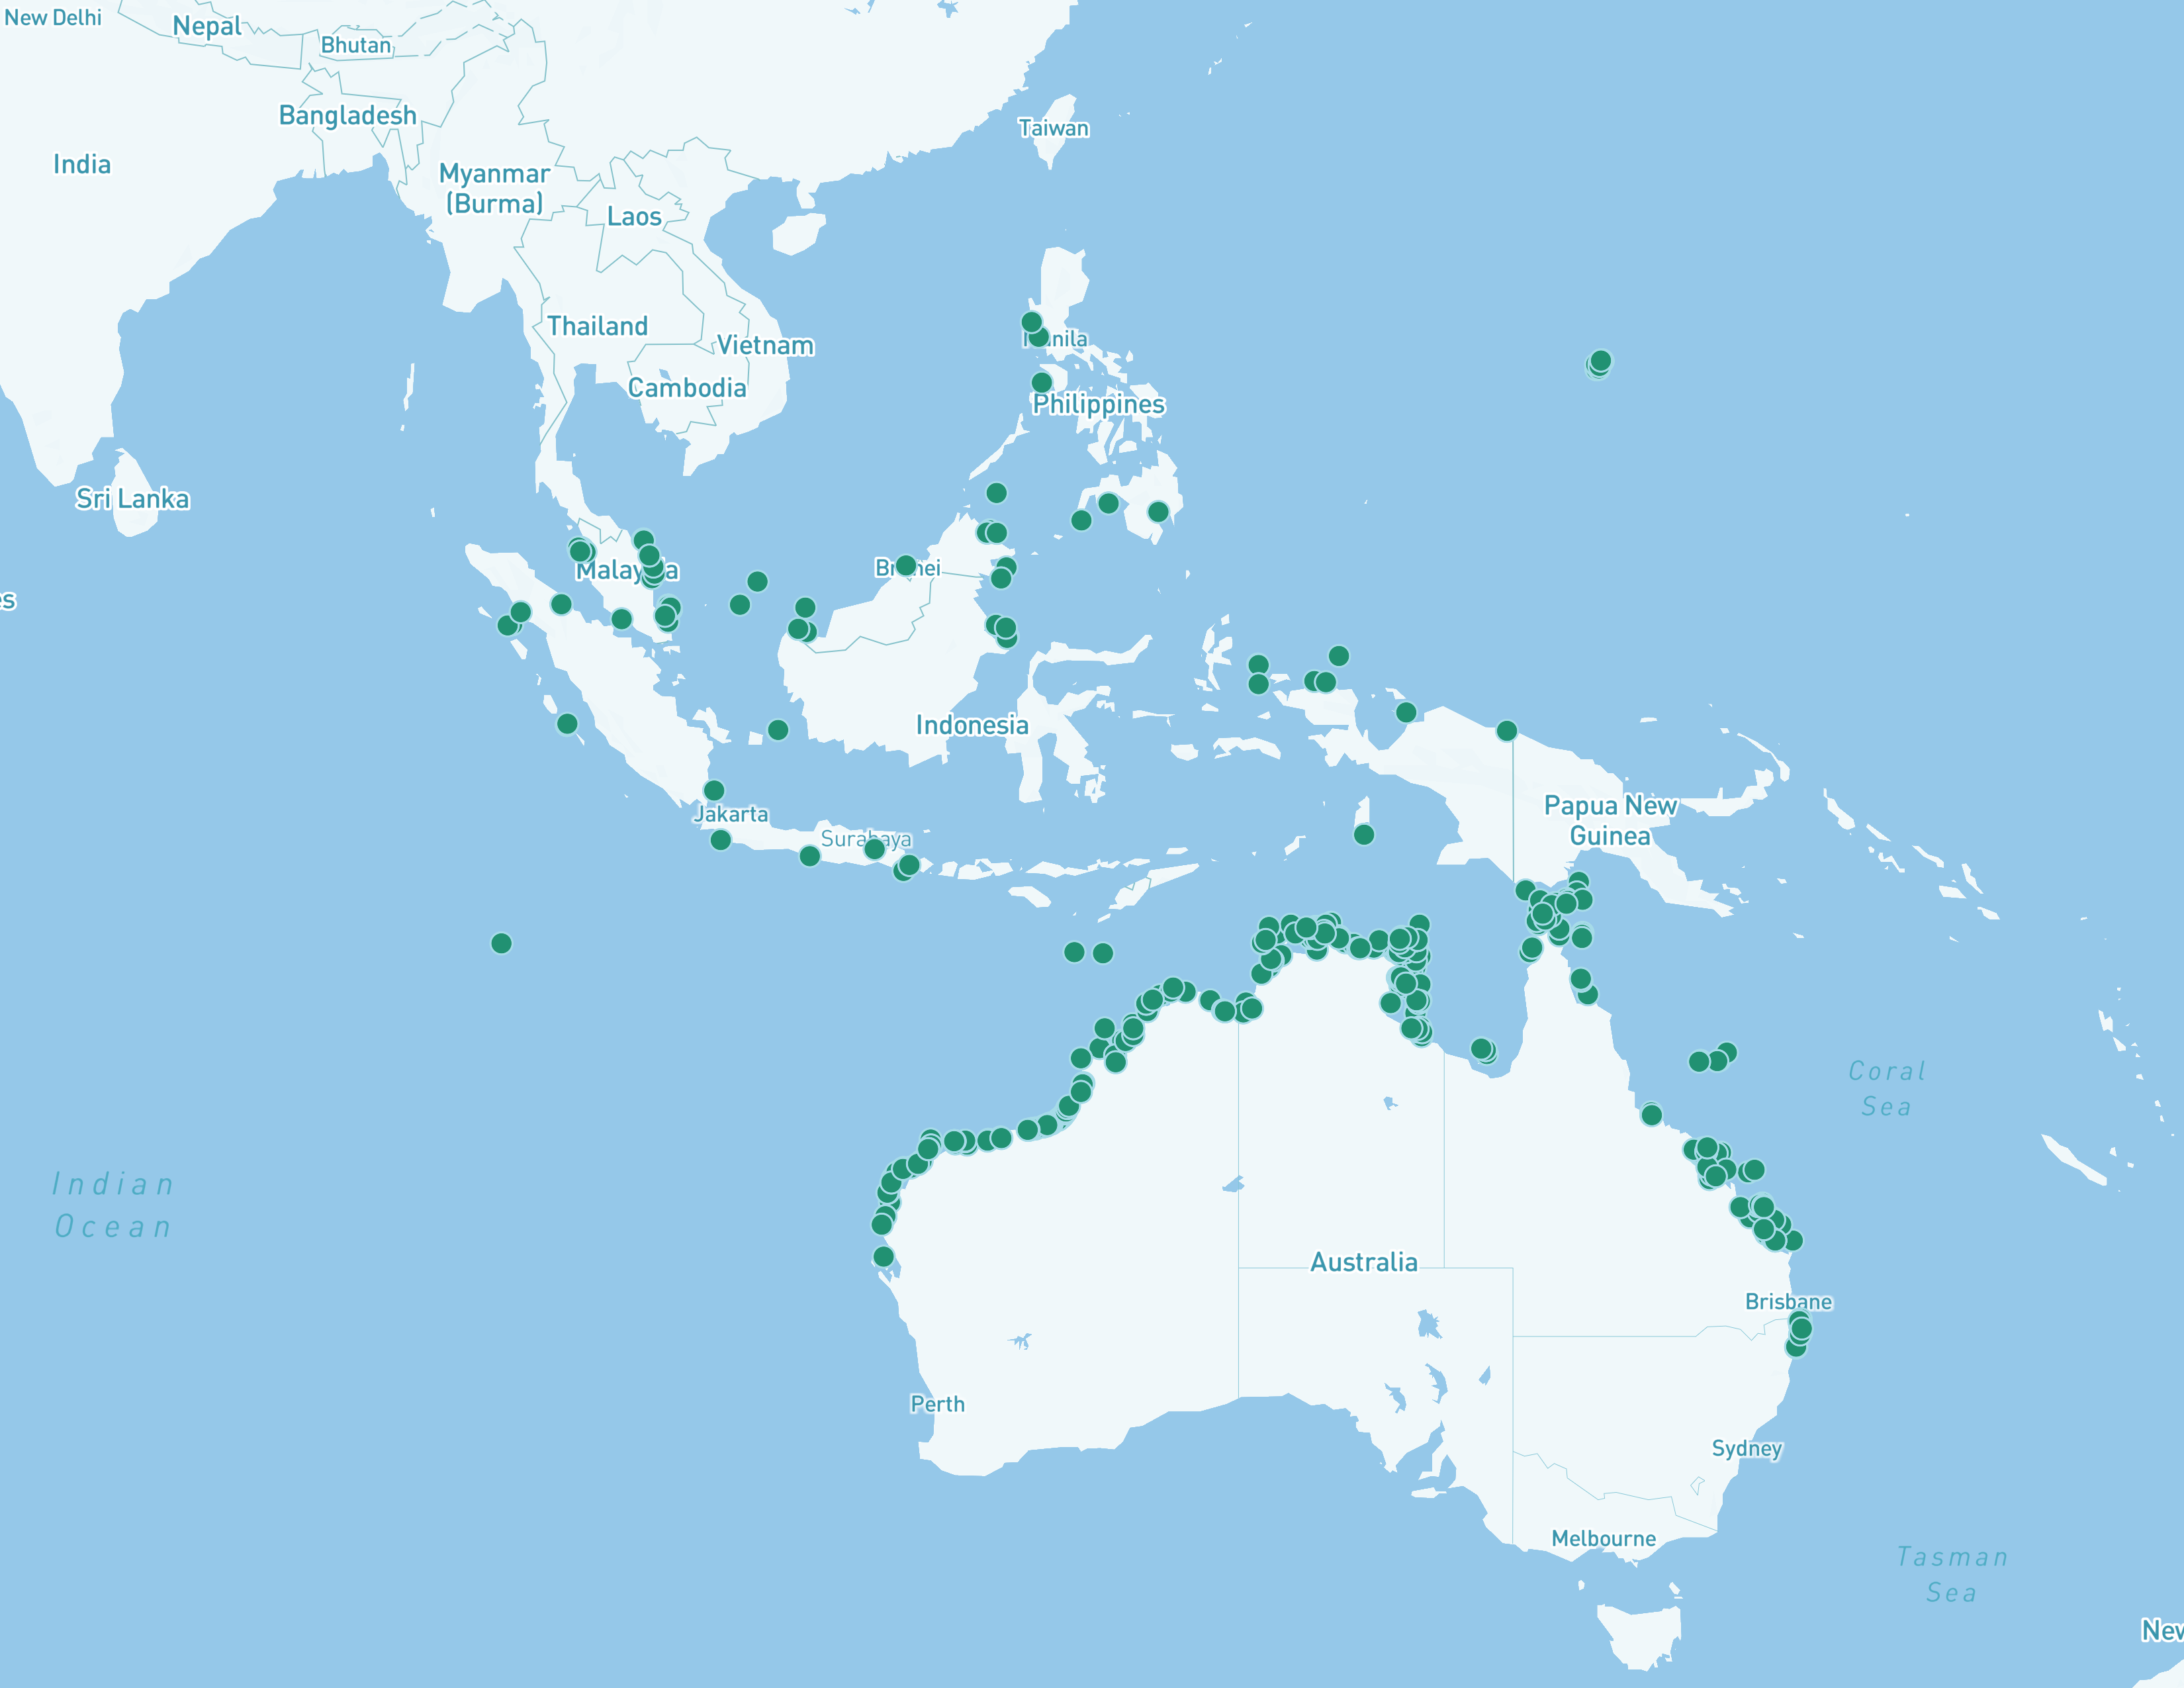

In [26]:
#display number of sea turtle nesting sites in each APAC country
nest_per_country = site_locations['country'].value_counts()
nest_per_country


country
Australia                  358
Malaysia                    73
Indonesia                   41
Guam                        16
Philippines                  9
Brunei Darussalam            1
Cocos (Keeling) Islands      1
Name: count, dtype: int64

In [27]:
#filter number of species in each country and display the names of the sea turtles
species_list = site_locations.groupby('country').agg({'species': lambda x: x.unique().tolist(), 'common_name': 'first'}).reset_index()
species_count.columns = ['country', 'unique_species_count', 'common_name']
species_count

,country,unique_species_count,common_name
0,Australia,6,Flatback sea turtle
1,Brunei Darussalam,1,Olive ridley
2,Cocos (Keeling) Islands,1,Green sea turtle
3,Guam,1,Green sea turtle
4,Indonesia,4,Olive ridley
5,Malaysia,4,Green sea turtle
6,Philippines,2,Hawksbill sea turtle


### Sea Turtle Hatching Temperatures

"Research shows that if a turtle's eggs incubate below 27.7° Celsius (81.86° Fahrenheit), the turtle hatchlings will be male. If the eggs incubate above 31° Celsius (88.8° Fahrenheit), however, the hatchlings will be female. Temperatures that fluctuate between the two extremes will produce a mix of male and female baby turtles.

Researchers have also noted that the warmer the sand, the higher the ratio of female turtles. As the Earth experiences climate change, increased temperatures could result in skewed and even lethal incubation conditions, which would impact turtle species and other reptiles."

Source: https://oceanservice.noaa.gov/facts/temperature-dependent.html


*Summary* 

male: below 27.7° Celsius (81.86° Fahrenheit)

female: above 31° Celsius (88.8° Fahrenheit)

the warmer the sand, the higher the ratio of female turtles

In [69]:
# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(90, 79, -1), range(90, 79, -1))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color=alt.Color('z:Q', scale=alt.Scale(scheme='blueorange'))
).properties(
    title="Higher temperatures make female turtle hatchlings",
    
)


alt.Chart(...)

### Now, let's explore the surface temperatures in the nesting site locations during the fourth quarter of 2023


### Global Temperatures
"The year 2023 was the warmest year since global records began in 1850 at 1.18°C (2.12°F) above the 20th century average of 13.9°C (57.0°F). This value is 0.15°C (0.27°F) more than the previous record set in 2016. The 10 warmest years in the 174-year record have all occurred during the last decade (2014–2023)."

source: https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202313#:~:text=Global%20ocean%20temperatures%20in%202023,of%20any%20month%20on%20record.